In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Suppress warnings
warnings.filterwarnings('ignore')

# Set matplotlib inline for Colab
%matplotlib inline

In [3]:
# Upload the file in Colab
from google.colab import files
uploaded = files.upload()

# Load the dataset (assuming you save it as 'stock_prices.csv')
df = pd.read_csv('stock_data.csv')

# Fix the unnamed date column (if present)
df = df.rename(columns={'Unnamed: 0': 'Date'})
df['Date'] = pd.to_datetime(df['Date'])

# Set Date as index
df.set_index('Date', inplace=True)

# Display sample and basic info
print("Sample of the dataset:")
print(df.sample(5))

print(f"\nNumber of Columns: {len(df.columns)}\n")
print(df.columns)

Saving stock_data.csv to stock_data (1).csv
Sample of the dataset:
               Stock_1    Stock_2     Stock_3     Stock_4     Stock_5
Date                                                                 
2020-03-11   99.132463  91.989507   89.388355  115.382730  103.850167
2020-12-21   94.090921  65.483086  100.340207  116.717384  104.089886
2020-05-30  119.660669  87.603326   87.088161  128.966802  105.726342
2020-03-31   99.708643  94.251751   92.227825  120.023400  102.742672
2020-11-25  101.279905  63.835177  106.449089  115.265682  110.317126

Number of Columns: 5

Index(['Stock_1', 'Stock_2', 'Stock_3', 'Stock_4', 'Stock_5'], dtype='object')


In [4]:
# Check basic info
print("\nDataset Info:")
print(df.info())

# Statistical analysis
print("\nStatistical Description:")
print(df.describe())

# Check null values
print("\nNull Values:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2020-01-01 to 2020-12-30
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Stock_1  365 non-null    float64
 1   Stock_2  365 non-null    float64
 2   Stock_3  365 non-null    float64
 3   Stock_4  365 non-null    float64
 4   Stock_5  365 non-null    float64
dtypes: float64(5)
memory usage: 17.1 KB
None

Statistical Description:
          Stock_1     Stock_2     Stock_3     Stock_4     Stock_5
count  365.000000  365.000000  365.000000  365.000000  365.000000
mean   107.772577   81.105216   94.519502  117.407560  106.866865
std      7.398296   11.435212    6.519213    6.778527    3.760968
min     91.474442   62.414219   81.111434   99.909756   99.833309
25%    101.603117   69.328263   89.788068  112.209912  103.927072
50%    107.421299   84.283525   94.495546  117.788079  106.411328
75%    113.741728   91.548859   99.919465  123.132365  109.178

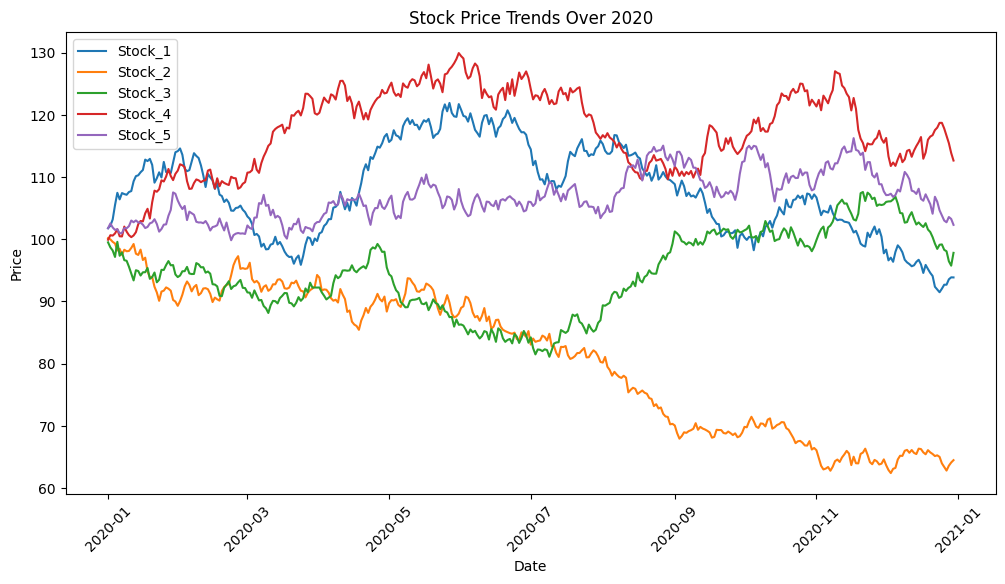

In [5]:
# Plot price trends for all stocks
plt.figure(figsize=(12, 6))
for column in df.columns:
    plt.plot(df.index, df[column], label=column)
plt.title('Stock Price Trends Over 2020')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()

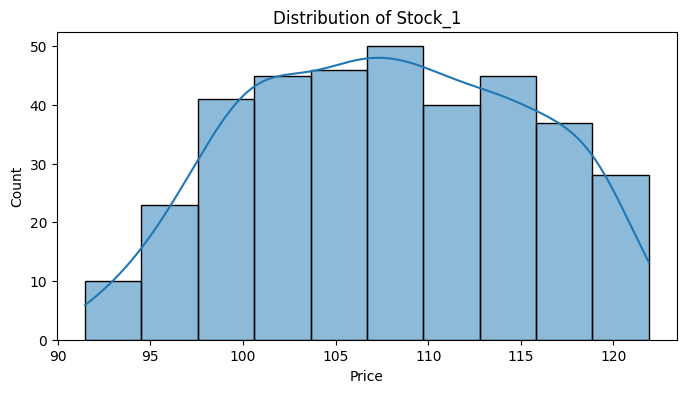

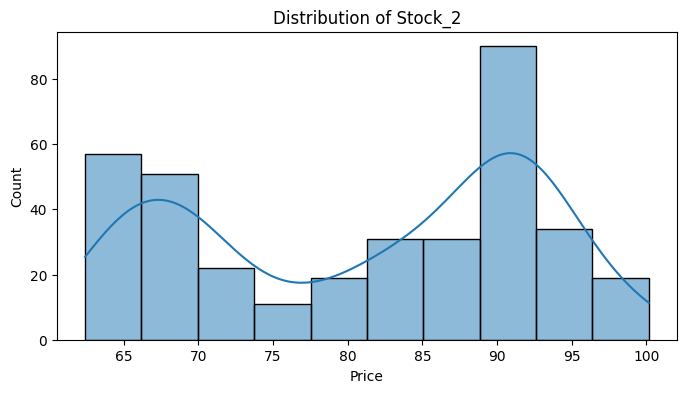

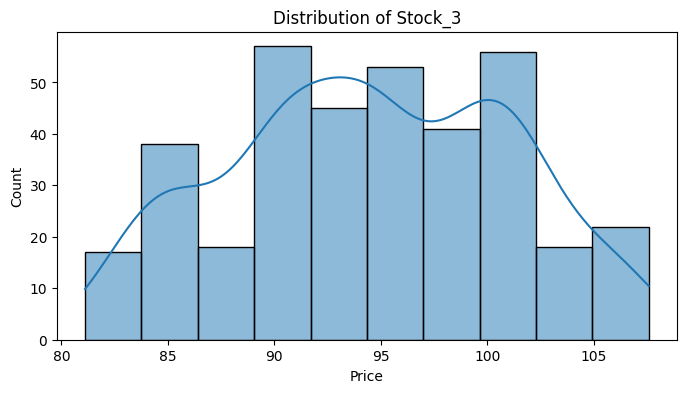

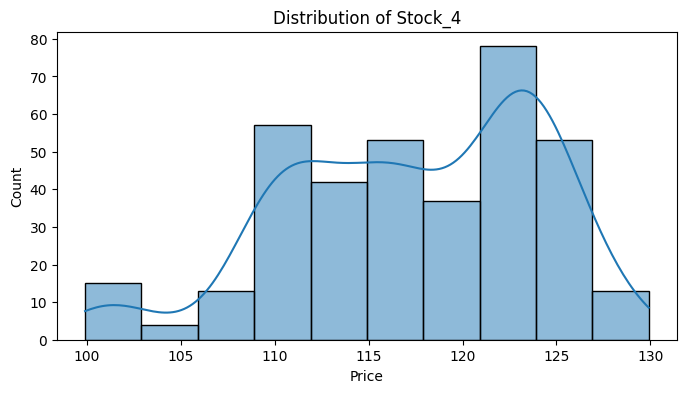

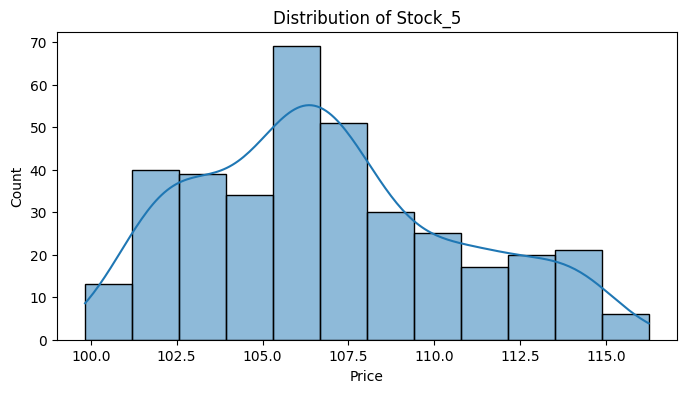

In [6]:
# Check distribution of each stock's prices
numerical_features = df.columns

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel('Price')
    plt.show()

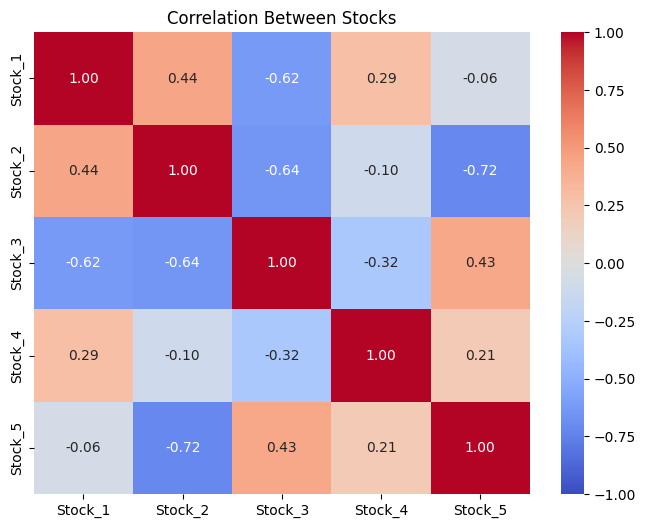


Correlation with Stock_1:
Stock_1    1.000000
Stock_2    0.441239
Stock_4    0.285507
Stock_5   -0.063183
Stock_3   -0.619768
Name: Stock_1, dtype: float64


In [7]:
# Correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Between Stocks")
plt.show()

print("\nCorrelation with Stock_1:")
print(correlation_matrix['Stock_1'].sort_values(ascending=False))

In [8]:
# Create features: previous day's price and moving average for Stock_1
df['Stock_1_Lag1'] = df['Stock_1'].shift(1)  # Previous day's price
df['Stock_1_MA5'] = df['Stock_1'].rolling(window=5).mean()  # 5-day moving average

# Optionally add other stocks as features
df['Stock_2_Lag1'] = df['Stock_2'].shift(1)
df['Stock_3_Lag1'] = df['Stock_3'].shift(1)

# Drop rows with NaN (due to shifting/rolling)
df = df.dropna()

# Define target (Stock_1) and features
target_col = 'Stock_1'
features_cols = ['Stock_1_Lag1', 'Stock_1_MA5', 'Stock_2_Lag1', 'Stock_3_Lag1']

X = df[features_cols]
y = df[target_col]

# Train-test split (80% train, 20% test, sequential split for time series)
split_index = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

print(f"\nTraining set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")


Training set size: 288
Testing set size: 73


In [9]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regressor (SVR)": SVR(),
    "K-Nearest Neighbors (KNN)": KNeighborsRegressor(),
}

# Store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    # Predict on test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2
    }


Model Performance Results:

Linear Regression:
MAE: 0.7094606492109155
MSE: 0.8001431484541784
RMSE: 0.8945072098391261
R²: 0.9637523229112891

Decision Tree:
MAE: 2.3024915706922964
MSE: 9.322003917492324
RMSE: 3.0531956893544057
R²: 0.5776993298339657

Random Forest:
MAE: 1.680436363944767
MSE: 5.4356600273047775
RMSE: 2.3314501983325266
R²: 0.7537564999282869

Support Vector Regressor (SVR):
MAE: 2.8621916909524554
MSE: 14.006023553769214
RMSE: 3.7424622314419174
R²: 0.3655062596552624

K-Nearest Neighbors (KNN):
MAE: 2.7072467981193697
MSE: 13.814854848363364
RMSE: 3.7168339818134686
R²: 0.37416648691135457

Comparison of All Models:
                                     MAE        MSE      RMSE        R²
Linear Regression               0.709461   0.800143  0.894507  0.963752
Decision Tree                   2.302492   9.322004  3.053196  0.577699
Random Forest                   1.680436   5.435660  2.331450  0.753756
Support Vector Regressor (SVR)  2.862192  14.006024  3.742462  0.

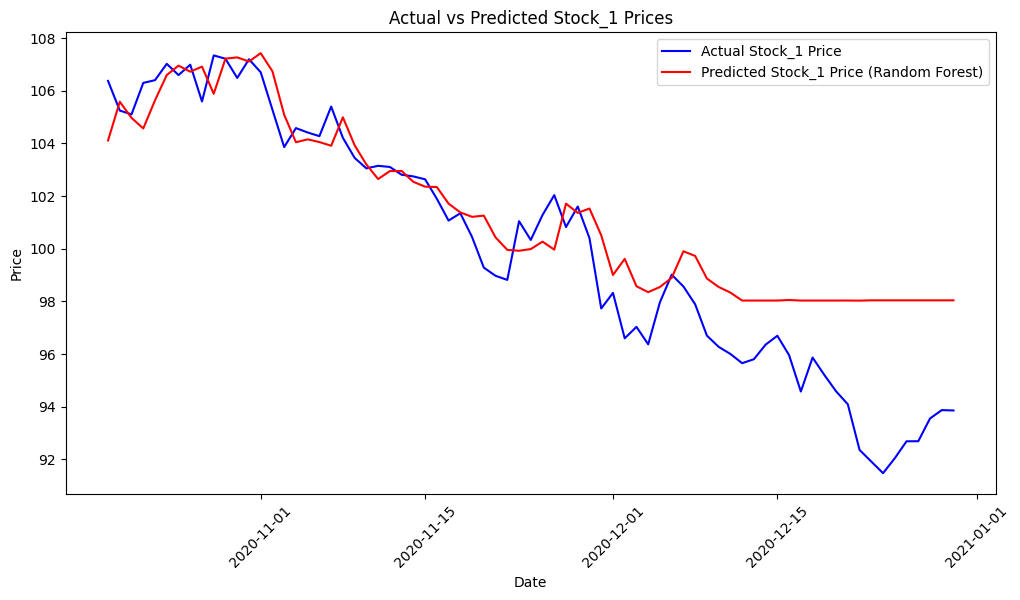

In [10]:
# Plotting the time series of stock prices
df_Stock['Close'].plot(figsize=(10, 7))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()